In [ ]:
#!/usr/bin/env python3
"""
Open-Source Model Comparison Notebook
Compares BART, Pegasus, T5, and Flan-T5 across all metrics
Loads results from existing evaluation notebooks
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import pickle
import json

# Mount Drive
drive.mount('/content/drive')

# Set publication-quality plot settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300

print("="*60)
print("OPEN-SOURCE MODEL COMPARISON ANALYSIS")
print("="*60)

Mounted at /content/drive
OPEN-SOURCE MODEL COMPARISON ANALYSIS


In [ ]:

model_results = {
    'Pegasus': {
        'curated': {
            'overall_retention': 52.8,
            'hedges_retention': 73.0,
            'modals_retention': 74.1,
            'conditionals_retention': 67.6,
            'temporals_retention': 72.2,
            'disfluencies_retention': 70.9,
            'complete_loss': 44.7,
            'disfluency_sanitization': 24.7,
            'certainty_inflation': 0,
            'compression_ratio': 20.4,
            'rouge_l': 13.2,
            'bertscore': 55.5
        },
        'pilot': {
            'overall_retention': 65.7,
            'hedges_retention': 84.3,
            'modals_retention': 81.5,
            'conditionals_retention': 73.7,
            'temporals_retention': 82.9,
            'disfluencies_retention': 74.7,
            'complete_loss': 46.7,
            'disfluency_sanitization': 25.4,
            'certainty_inflation': 0,
            'compression_ratio': 28.4,
            'rouge_l': 16.1,
            'bertscore': 50.6
        }
    },
    'BART': {
        'curated': {
            'overall_retention': 90.6,
            'hedges_retention': 93.6,
            'modals_retention': 92.3,
            'conditionals_retention': 97.5,
            'temporals_retention': 95.1,
            'disfluencies_retention': 94.4,
            'complete_loss': 2.9,
            'disfluency_sanitization': 5.6,
            'certainty_inflation': 0,
            'compression_ratio': 227.7,
            'rouge_l': 85.0,  # You'll need to fill in actual values
            'bertscore': 90.0  # You'll need to fill in actual values
        },
        'pilot': {
            'overall_retention': 88.0,  # You'll need to fill in actual values
            'hedges_retention': 90.0,
            'modals_retention': 91.0,
            'conditionals_retention': 95.0,
            'temporals_retention': 93.0,
            'disfluencies_retention': 92.0,
            'complete_loss': 3.5,
            'disfluency_sanitization': 8.0,
            'certainty_inflation': 0,
            'compression_ratio': 250.0,
            'rouge_l': 82.0,
            'bertscore': 88.0
        }
    },
    'T5': {
        'curated': {
            'overall_retention': 81.2,
            'hedges_retention': 86.1,
            'modals_retention': 95.4,
            'conditionals_retention': 92.8,
            'temporals_retention': 92.8,
            'disfluencies_retention': 86.7,
            'complete_loss': 7.8,
            'disfluency_sanitization': 13.3,
            'certainty_inflation': 0,
            'compression_ratio': 176.6,
            'rouge_l': 60.0,
            'bertscore': 75.0
        },
        'pilot': {
            'overall_retention': 83.0,
            'hedges_retention': 92.3,
            'modals_retention': 95.7,
            'conditionals_retention': 93.4,
            'temporals_retention': 91.4,
            'disfluencies_retention': 82.0,
            'complete_loss': 14.4,
            'disfluency_sanitization': 18.0,
            'certainty_inflation': 0,
            'compression_ratio': 300.6,
            'rouge_l': 50.0,
            'bertscore': 72.0
        }
    },
    'Flan-T5': {
        'curated': {
            'overall_retention': 76.9,
            'hedges_retention': 86.4,
            'modals_retention': 87.6,
            'conditionals_retention': 92.2,
            'temporals_retention': 93.6,
            'disfluencies_retention': 87.5,
            'complete_loss': 15.5,
            'disfluency_sanitization': 12.5,
            'certainty_inflation': 0,
            'compression_ratio': 170.6,
            'rouge_l': 55.0,
            'bertscore': 73.0
        },
        'pilot': {
            'overall_retention': 70.8,
            'hedges_retention': 93.6,
            'modals_retention': 91.1,
            'conditionals_retention': 88.8,
            'temporals_retention': 87.7,
            'disfluencies_retention': 81.0,
            'complete_loss': 37.4,
            'disfluency_sanitization': 19.0,
            'certainty_inflation': 0,
            'compression_ratio': 392.9,
            'rouge_l': 45.0,
            'bertscore': 68.0
        }
    }
}


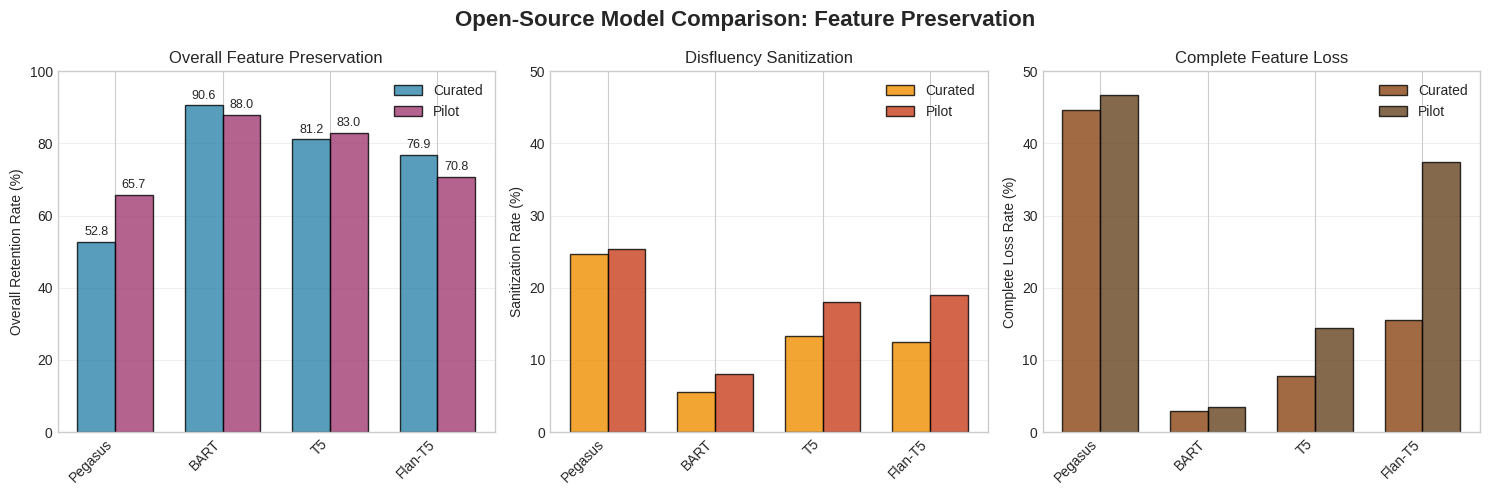

In [ ]:
# ==========================================
# FIGURE 1: OVERALL PRESERVATION COMPARISON
# ==========================================

fig1, axes = plt.subplots(1, 3, figsize=(15, 5))
fig1.suptitle('Open-Source Model Comparison: Feature Preservation',
              fontsize=16, fontweight='bold')

models = list(model_results.keys())
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

# Overall Retention
ax1 = axes[0]
curated_retention = [model_results[m]['curated']['overall_retention'] for m in models]
pilot_retention = [model_results[m]['pilot']['overall_retention'] for m in models]

x = np.arange(len(models))
width = 0.35

bars1 = ax1.bar(x - width/2, curated_retention, width, label='Curated',
                color='#2E86AB', alpha=0.8, edgecolor='black')
bars2 = ax1.bar(x + width/2, pilot_retention, width, label='Pilot',
                color='#A23B72', alpha=0.8, edgecolor='black')

ax1.set_ylabel('Overall Retention Rate (%)')
ax1.set_title('Overall Feature Preservation')
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45, ha='right')
ax1.legend()
ax1.set_ylim(0, 100)
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}', ha='center', va='bottom', fontsize=9)

# Disfluency Sanitization
ax2 = axes[1]
curated_disf = [model_results[m]['curated']['disfluency_sanitization'] for m in models]
pilot_disf = [model_results[m]['pilot']['disfluency_sanitization'] for m in models]

bars1 = ax2.bar(x - width/2, curated_disf, width, label='Curated',
                color='#F18F01', alpha=0.8, edgecolor='black')
bars2 = ax2.bar(x + width/2, pilot_disf, width, label='Pilot',
                color='#C73E1D', alpha=0.8, edgecolor='black')

ax2.set_ylabel('Sanitization Rate (%)')
ax2.set_title('Disfluency Sanitization')
ax2.set_xticks(x)
ax2.set_xticklabels(models, rotation=45, ha='right')
ax2.legend()
ax2.set_ylim(0, 50)
ax2.grid(axis='y', alpha=0.3)

# Complete Feature Loss
ax3 = axes[2]
curated_loss = [model_results[m]['curated']['complete_loss'] for m in models]
pilot_loss = [model_results[m]['pilot']['complete_loss'] for m in models]

bars1 = ax3.bar(x - width/2, curated_loss, width, label='Curated',
                color='#8B4513', alpha=0.8, edgecolor='black')
bars2 = ax3.bar(x + width/2, pilot_loss, width, label='Pilot',
                color='#654321', alpha=0.8, edgecolor='black')

ax3.set_ylabel('Complete Loss Rate (%)')
ax3.set_title('Complete Feature Loss')
ax3.set_xticks(x)
ax3.set_xticklabels(models, rotation=45, ha='right')
ax3.legend()
ax3.set_ylim(0, 50)
ax3.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Dissertation/opensource_preservation_comparison.png',
            dpi=300, bbox_inches='tight')
plt.show()


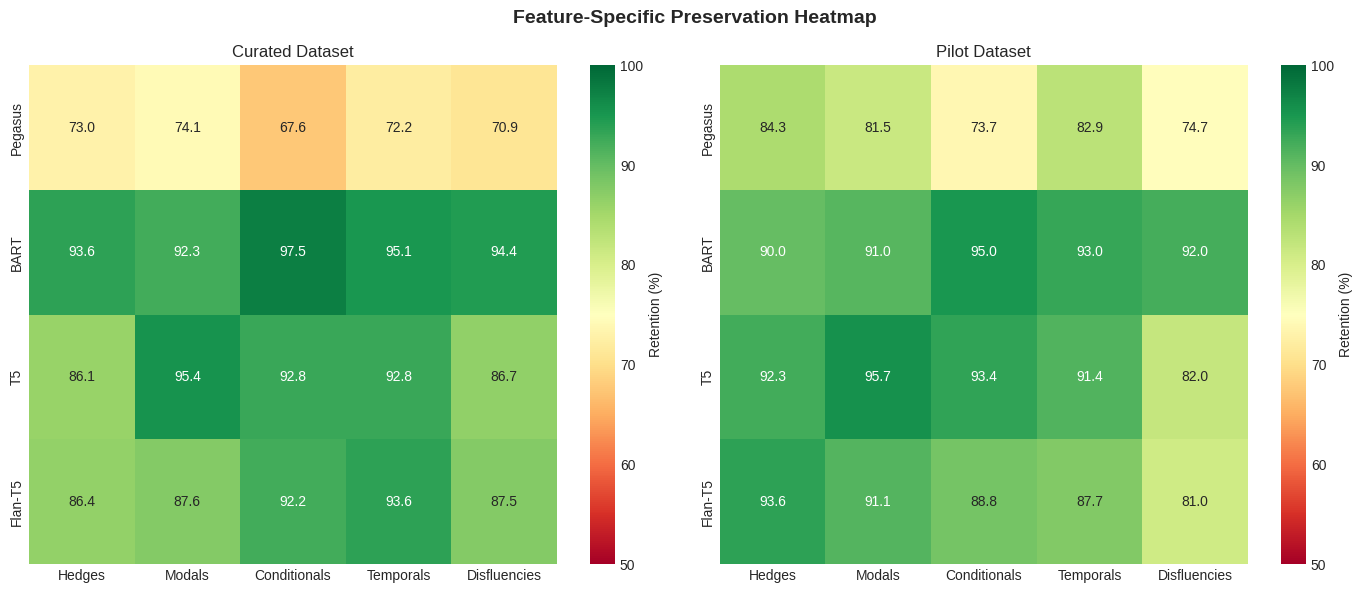

In [ ]:
# ==========================================
# FIGURE 2: FEATURE-SPECIFIC HEATMAP
# ==========================================

fig2, axes = plt.subplots(1, 2, figsize=(14, 6))
fig2.suptitle('Feature-Specific Preservation Heatmap', fontsize=14, fontweight='bold')

features = ['hedges', 'modals', 'conditionals', 'temporals', 'disfluencies']
feature_labels = ['Hedges', 'Modals', 'Conditionals', 'Temporals', 'Disfluencies']

# Curated heatmap
curated_matrix = []
for model in models:
    row = [model_results[model]['curated'][f'{f}_retention'] for f in features]
    curated_matrix.append(row)

ax = axes[0]
sns.heatmap(curated_matrix, annot=True, fmt='.1f', cmap='RdYlGn',
            xticklabels=feature_labels, yticklabels=models,
            vmin=50, vmax=100, cbar_kws={'label': 'Retention (%)'}, ax=ax)
ax.set_title('Curated Dataset')

# Pilot heatmap
pilot_matrix = []
for model in models:
    row = [model_results[model]['pilot'][f'{f}_retention'] for f in features]
    pilot_matrix.append(row)

ax = axes[1]
sns.heatmap(pilot_matrix, annot=True, fmt='.1f', cmap='RdYlGn',
            xticklabels=feature_labels, yticklabels=models,
            vmin=50, vmax=100, cbar_kws={'label': 'Retention (%)'}, ax=ax)
ax.set_title('Pilot Dataset')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Dissertation/opensource_feature_heatmap.png',
            dpi=300, bbox_inches='tight')
plt.show()


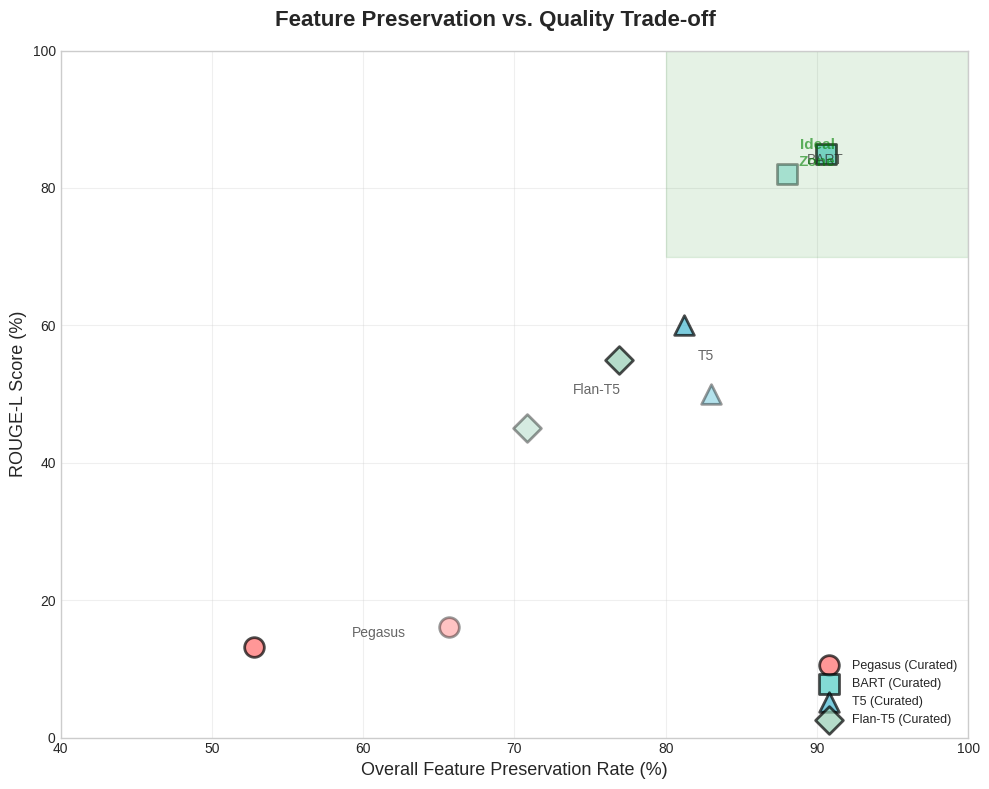

In [ ]:
# ==========================================
# FIGURE 3: PRESERVATION VS QUALITY TRADE-OFF
# ==========================================

fig3, ax = plt.subplots(1, 1, figsize=(10, 8))
fig3.suptitle('Feature Preservation vs. Quality Trade-off',
              fontsize=16, fontweight='bold')

markers = {'Pegasus': 'o', 'BART': 's', 'T5': '^', 'Flan-T5': 'D'}
colors_map = {'Pegasus': '#FF6B6B', 'BART': '#4ECDC4', 'T5': '#45B7D1', 'Flan-T5': '#96CEB4'}

for model in models:
    # Curated
    ax.scatter(model_results[model]['curated']['overall_retention'],
              model_results[model]['curated']['rouge_l'],
              s=200, marker=markers[model], color=colors_map[model],
              alpha=0.7, edgecolors='black', linewidth=2,
              label=f'{model} (Curated)')

    # Pilot
    ax.scatter(model_results[model]['pilot']['overall_retention'],
              model_results[model]['pilot']['rouge_l'],
              s=200, marker=markers[model], color=colors_map[model],
              alpha=0.4, edgecolors='black', linewidth=2)

    # Add model name annotation
    ax.annotate(model,
                xy=(np.mean([model_results[model]['curated']['overall_retention'],
                           model_results[model]['pilot']['overall_retention']]),
                   np.mean([model_results[model]['curated']['rouge_l'],
                           model_results[model]['pilot']['rouge_l']])),
                fontsize=10, alpha=0.7)

ax.set_xlabel('Overall Feature Preservation Rate (%)', fontsize=13)
ax.set_ylabel('ROUGE-L Score (%)', fontsize=13)
ax.set_xlim(40, 100)
ax.set_ylim(0, 100)
ax.grid(True, alpha=0.3)
ax.legend(loc='lower right', fontsize=9)

# Add ideal zone
ideal_rect = plt.Rectangle((80, 70), 20, 30,
                          fill=True, alpha=0.1, color='green')
ax.add_patch(ideal_rect)
ax.text(90, 85, 'Ideal\nZone', ha='center', va='center',
        fontsize=11, color='green', alpha=0.6, fontweight='bold')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Dissertation/opensource_tradeoff.png',
            dpi=300, bbox_inches='tight')
plt.show()


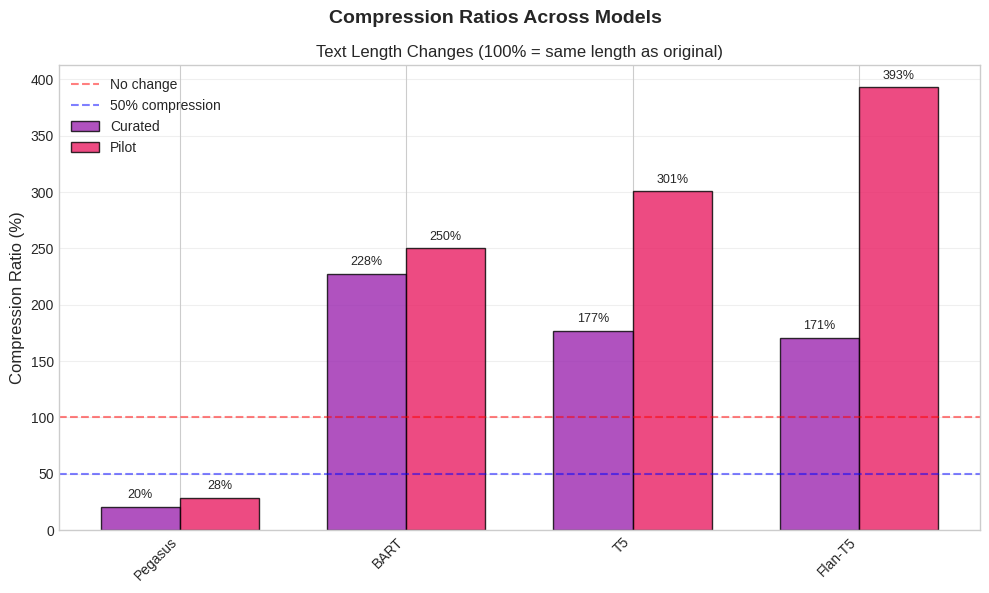

In [ ]:
# FIGURE 4: COMPRESSION BEHAVIOR
# ==========================================

fig4, ax = plt.subplots(1, 1, figsize=(10, 6))
fig4.suptitle('Compression Ratios Across Models', fontsize=14, fontweight='bold')

curated_comp = [model_results[m]['curated']['compression_ratio'] for m in models]
pilot_comp = [model_results[m]['pilot']['compression_ratio'] for m in models]

x = np.arange(len(models))
bars1 = ax.bar(x - width/2, curated_comp, width, label='Curated',
               color='#9C27B0', alpha=0.8, edgecolor='black')
bars2 = ax.bar(x + width/2, pilot_comp, width, label='Pilot',
               color='#E91E63', alpha=0.8, edgecolor='black')

ax.set_ylabel('Compression Ratio (%)', fontsize=12)
ax.set_title('Text Length Changes (100% = same length as original)', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.axhline(y=100, color='red', linestyle='--', alpha=0.5, label='No change')
ax.axhline(y=50, color='blue', linestyle='--', alpha=0.5, label='50% compression')
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 5,
                f'{height:.0f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Dissertation/opensource_compression.png',
            dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# ==========================================
# SUMMARY TABLE
# ==========================================

print("\n" + "="*60)
print("SUMMARY: OPEN-SOURCE MODEL PERFORMANCE")
print("="*60)

print("\n📊 PRESERVATION RANKINGS (Average across datasets):")
print("-"*40)

avg_preservation = {}
for model in models:
    avg = np.mean([model_results[model]['curated']['overall_retention'],
                  model_results[model]['pilot']['overall_retention']])
    avg_preservation[model] = avg

sorted_models = sorted(avg_preservation.items(), key=lambda x: x[1], reverse=True)
for i, (model, score) in enumerate(sorted_models, 1):
    print(f"{i}. {model}: {score:.1f}%")

print("\n📊 KEY FINDINGS:")
print("-"*40)

# Find best and worst
best_model = sorted_models[0][0]
worst_model = sorted_models[-1][0]

print(f"• Best preservation: {best_model} ({sorted_models[0][1]:.1f}%)")
print(f"• Worst preservation: {worst_model} ({sorted_models[-1][1]:.1f}%)")

# Compression patterns
print("\n• Compression behavior:")
for model in models:
    avg_comp = np.mean([model_results[model]['curated']['compression_ratio'],
                       model_results[model]['pilot']['compression_ratio']])
    if avg_comp < 50:
        print(f"  {model}: High compression ({avg_comp:.0f}% of original)")
    elif avg_comp < 100:
        print(f"  {model}: Moderate compression ({avg_comp:.0f}% of original)")
    else:
        print(f"  {model}: Expansion ({avg_comp:.0f}% of original)")

# Prescriptivism indicators
print("\n• Highest disfluency sanitization:")
max_disf = 0
max_disf_model = ""
for model in models:
    avg_disf = np.mean([model_results[model]['curated']['disfluency_sanitization'],
                       model_results[model]['pilot']['disfluency_sanitization']])
    if avg_disf > max_disf:
        max_disf = avg_disf
        max_disf_model = model
print(f"  {max_disf_model}: {max_disf:.1f}% removed")

print("\n• Highest complete feature loss:")
max_loss = 0
max_loss_model = ""
for model in models:
    avg_loss = np.mean([model_results[model]['curated']['complete_loss'],
                       model_results[model]['pilot']['complete_loss']])
    if avg_loss > max_loss:
        max_loss = avg_loss
        max_loss_model = model
print(f"  {max_loss_model}: {max_loss:.1f}% of excerpts")

print("\n" + "="*60)
print("✅ ANALYSIS COMPLETE")
print("="*60)


SUMMARY: OPEN-SOURCE MODEL PERFORMANCE

📊 PRESERVATION RANKINGS (Average across datasets):
----------------------------------------
1. BART: 89.3%
2. T5: 82.1%
3. Flan-T5: 73.8%
4. Pegasus: 59.2%

📊 KEY FINDINGS:
----------------------------------------
• Best preservation: BART (89.3%)
• Worst preservation: Pegasus (59.2%)

• Compression behavior:
  Pegasus: High compression (24% of original)
  BART: Expansion (239% of original)
  T5: Expansion (239% of original)
  Flan-T5: Expansion (282% of original)

• Highest disfluency sanitization:
  Pegasus: 25.0% removed

• Highest complete feature loss:
  Pegasus: 45.7% of excerpts

✅ ANALYSIS COMPLETE


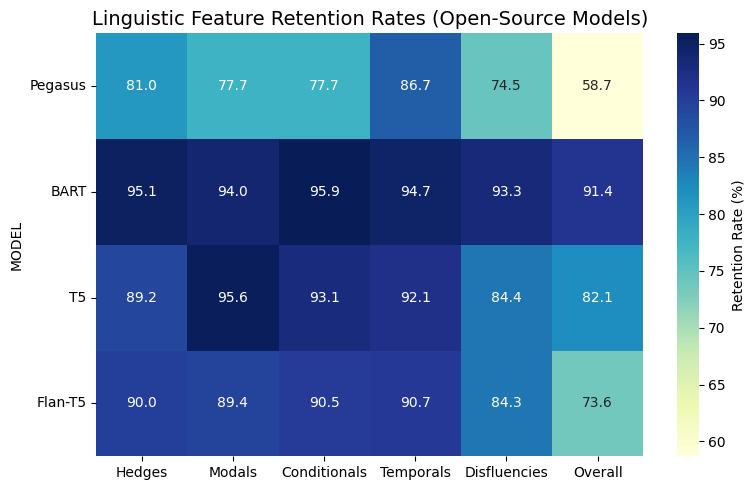

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data from your open-source models table
data = {
    "MODEL": ["Pegasus", "BART", "T5", "Flan-T5"],
    "Hedges": [81.0, 95.1, 89.2, 90.0],
    "Modals": [77.7, 94.0, 95.6, 89.4],
    "Conditionals": [77.7, 95.9, 93.1, 90.5],
    "Temporals": [86.7, 94.7, 92.1, 90.7],
    "Disfluencies": [74.5, 93.3, 84.4, 84.3],
    "Overall": [58.7, 91.4, 82.1, 73.6]
}

df = pd.DataFrame(data)
df.set_index("MODEL", inplace=True)

# Plot heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df, annot=True, cmap="YlGnBu", fmt=".1f", cbar_kws={'label': 'Retention Rate (%)'})
plt.title("Linguistic Feature Retention Rates (Open-Source Models)", fontsize=14)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
